# **Testing.Ipynb -- Ndiana's Summer Mini-MBE Project 2025**

Throughout this journal I test approaches which I plan to use in Python later throughout the process of this teslescope project at the University of Chicago's Yang Lab. The general goal should be to keep this Notebook as well organized as possible, including by depicting which specific approach Im testing and continuously writing explanations of the code I write and the choices I make and why I choose to make them

## Nozzle Image De-Noising

A signficant pre-cursor problem that will be challenging to address is the extent of the noise in the raw images captured by our camera. Previously Peter(@pravanlaa) was able to create a video of a de-noised video but it seems that according to him the results weren't very good to begin with. As a result, I plan to try to test different methods here in order to try and de-noise the images below.



Throughout much of the beginning of this project I regularly used multiple different images to asses the quality of my denoising techniques but instead below I've defined different images as variables and then set the test_image variable which can be set to any of the directory strings. By default it should be set to one which clearly depicts the nozzle.

'Nozzle-less' images are just images which didn't have the fine tip of the nozzle clearly visible.

### Conventional Image De-Noising Methods

In [3]:
#Import statements
import cv2
from matplotlib import pyplot as plt

In [4]:
NOISY_NOZZLELESS_IMAGE = 'noisy_image_1.jpg'
#the two images below are effectively the same image just one is rotated counter-clockwise 90deg. Tbe clockwise ;;;;;;;;;;;;;;;;;;
NOISY_NOZZLE_IMAGE = 'noisy_image_with_nozzle.jpg'
NOISY_NOZZLE_IMAGE_2 = 'noisy_nozzle_image.png'
#those below this point are much more different though, they depict only the tip of the nozzle and were part of a series of tests to determine
#whether a smaller area to denoise would improve model performance; however, they didn't as it seemed these zoomed in images were far too low resolution
NOISY_NOZZLE_ONLY = 'noisy_nozzle_only.png'

#test_img is the primary image being tested
test_img_dir = NOISY_NOZZLE_IMAGE

In [5]:
#Common method since I'm constantly displaying images
def show_img_as_plt(dir:str):
    img = cv2.imread(dir)
    plt.imshow(img)
    plt.show()
    return img

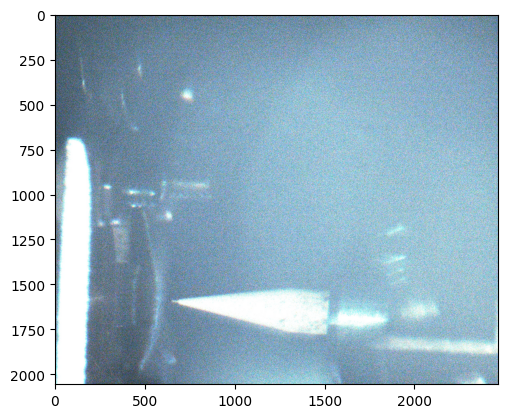

In [6]:
test_img_cv2 = show_img_as_plt(test_img_dir)

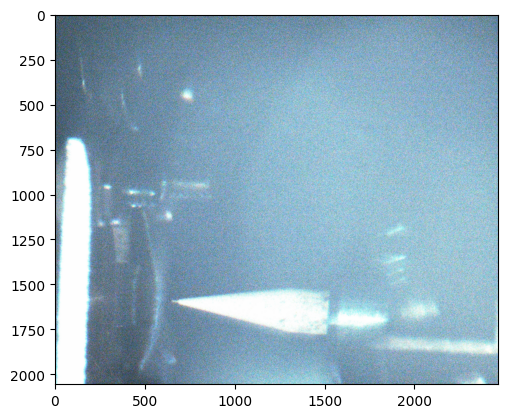

In [7]:


dst = cv2.fastNlMeansDenoisingColored(test_img_cv2, None, 10, 10, 7, 5)

plt.imshow(dst)
plt.show()

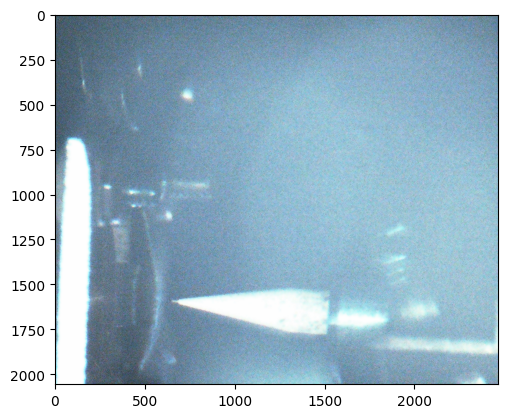

In [8]:
dst = cv2.fastNlMeansDenoisingColored(test_img_cv2, None, 10, 10, 2, 15)
plt.imshow(dst)


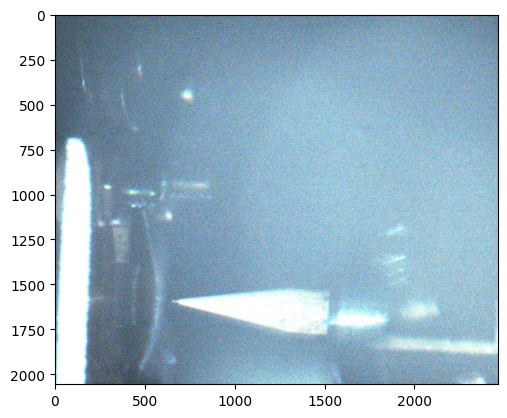

In [9]:

md_blur_denoised =   cv2.medianBlur(test_img_cv2, 3) # 3x3 kernel

plt.imshow(md_blur_denoised)
plt.show()

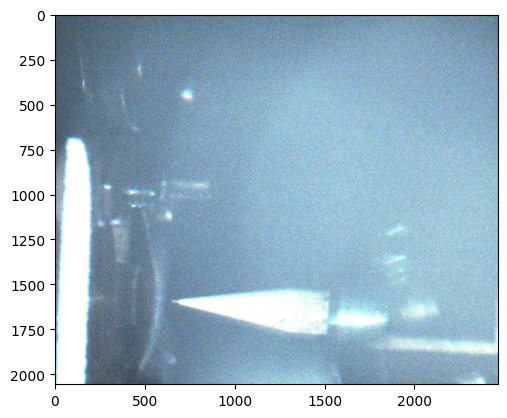

In [10]:

denoised_img = cv2.medianBlur(test_img_cv2, 5) 

plt.imshow(denoised_img)
plt.show()

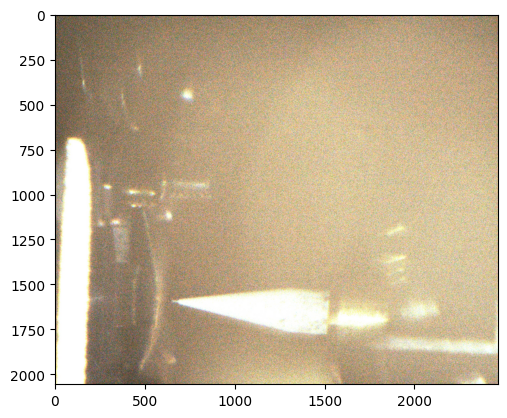

In [11]:
from PIL import Image, ImageFilter
PIL_im:Image = Image.open(test_img_dir)
dst_PIL = PIL_im.filter(filter=ImageFilter.MedianFilter)

plt.imshow(dst_PIL)

Ok so at this point it became relatively clear that conventional methods were failing to provide the results I wanted as it often seemed as if they almost all still came back incredibly grainy. Although the vast majority of these methods, especially the cv2's fastNlMeans and MedianBlur in order; however, they almost all significant decreased the quality of the fine tip of the nozzle; hence, why I began searching for Non-Conventional, Deep-Learning Based Methods of Denoising. 

I believe that potentially in the future I can objectively compare these different methods of image denoising by comparing the strength of the edge within a small range of pixels surround the fine tip of the nozzle and potentially tune the fastNlMeans model.

### Deep-Learning/Model-based Image Denoising Techniques

Following the aforementioned shortcomings of conventional de-noising methods I began to investigate model-based alternatives. I hoped that such alternatives would give similar results by sharpening edges while also not reducing the visible quality of the nozzle. 

I also believed that this would be relatively feasible primarily because of the fact that the computer used to read information from the MBE system does, in fact, have an Nvidia GPU allowing for CUDA processing; however, I'm not exactly sure whether the libraries im using will work with the GPU in question, since pytorch seems to not recognize it for some reason.

I also decided to use HyDE, which is mostly inteded for Hypterspectral imaging in contexts like Remote Sensing, 

In [12]:

%pip install git+https://github.com/fbcotter/pytorch_wavelets
%pip install hyde-images
%pip install torch

  Running command git clone --filter=blob:none --quiet https://github.com/fbcotter/pytorch_wavelets 'C:\Users\ndian\AppData\Local\Temp\pip-req-build-rb74c0i5'

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Cloning https://github.com/fbcotter/pytorch_wavelets to c:\users\ndian\appdata\local\temp\pip-req-build-rb74c0i5
  Resolved https://github.com/fbcotter/pytorch_wavelets to commit 9a0c507f04f43c5397e384bb6be8340169b2fd9a
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import hyde
import torch
import numpy as np

#defined some method(s) for conventional HyDE methods -- since the same process is used often
def show_tensor_output_as_plt(tensor):
    output_np = tensor.detach().cpu().numpy()
    output_np = np.clip(output_np, 0, 255).astype(np.uint8)
    plt.imshow(output_np)
    plt.show()
def apply_tensor(PIL_image: Image, method):
    input_tens = torch.tensor(np.array(PIL_image),dtype=torch.float32, device="cpu") #device is set to cpu since the laptop I'm testing this on doesn't have a gpu
    output_tens = method(input_tens)
    show_tensor_output_as_plt(output_tens)
    return output_tens

c:\Users\ndian\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_wavelets\dtcwt\coeffs.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream


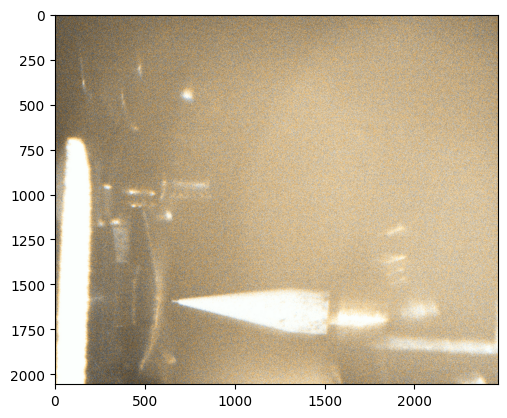

tensor([[[176.8707, 145.7604,  97.9105],
         [ 72.2938,  57.1297,  34.2850],
         [ 55.5943,  56.8024,  56.5129],
         ...,
         [144.3081, 130.3255, 106.5909],
         [ 91.2151,  76.2365,  52.9902],
         [ 79.9680,  65.3761,  43.0356]],

        [[146.9642, 127.5248,  96.3726],
         [ 89.0149,  75.9047,  55.2424],
         [ 48.5890,  50.1500,  50.5753],
         ...,
         [132.7476, 118.7516,  95.3964],
         [123.3830, 109.9130,  87.5860],
         [148.1832, 135.0967, 112.4321]],

        [[ 94.2322,  79.6500,  56.8320],
         [135.5659, 127.4326, 111.8517],
         [102.7950, 106.5646, 108.0913],
         ...,
         [168.3670, 155.7581, 133.0405],
         [179.2575, 167.7729, 146.1905],
         [191.6868, 181.2953, 160.7530]],

        ...,

        [[180.7919, 131.2844,  58.6000],
         [205.3501, 155.9469,  82.5580],
         [208.9355, 158.9264,  84.6008],
         ...,
         [150.5865, 140.9562, 122.8490],
         [184.8270, 17

In [14]:
hyres = hyde.HyRes()
apply_tensor(PIL_im, hyres)

In [ ]:
#Another attempt while I struggle to correctly use PyTorch
fast_hyde = hyde.fast_hyde()
apply_tensor(PIL_im,fast_hyde)

TypeError: 'module' object is not callable

In [15]:
import hyde
import torch
import numpy


input_tens = torch.tensor(np.array(PIL_im), dtype=torch.float32, device="cpu")
hyres = hyde.HyRes()
output = hyres(input_tens)


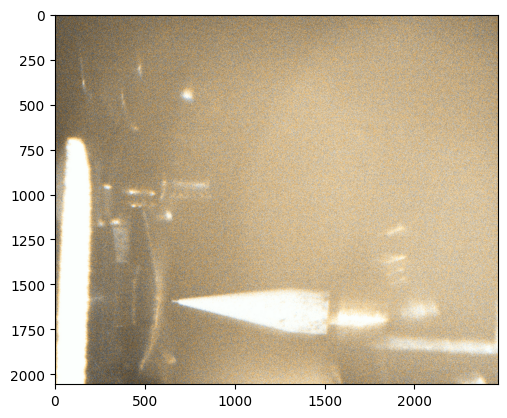

In [16]:
output_np = output.detach().cpu().numpy()
output_np = np.clip(output_np, 0, 255).astype(np.uint8)
plt.imshow(output_np)
plt.show()

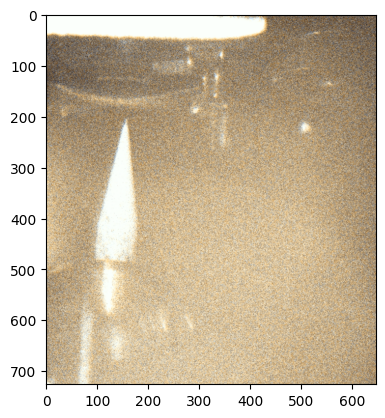

In [17]:


input_tens = torch.tensor(np.array(Image.open('noisy_nozzle_image.png')), dtype=torch.float32, device="cpu")
hyres = hyde.HyRes()
output = hyres(input_tens)

output_np = output.detach().cpu().numpy()
output_np = np.clip(output_np, 0, 255).astype(np.uint8)
plt.imshow(output_np)
plt.show()

In [18]:
def show_tensor_output_as_plt(tensor):
    output_np = tensor.detach().cpu().numpy()
    output_np = np.clip(output_np, 0, 255).astype(np.uint8)
    plt.imshow(output_np)
    plt.show()

c:\Users\ndian\AppData\Local\Programs\Python\Python312\Lib\site-packages\hyde\transform_domain\forpdn.py:155: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4416.)
  sigma = torch.sqrt(torch.var(w.T, dim=0).T)


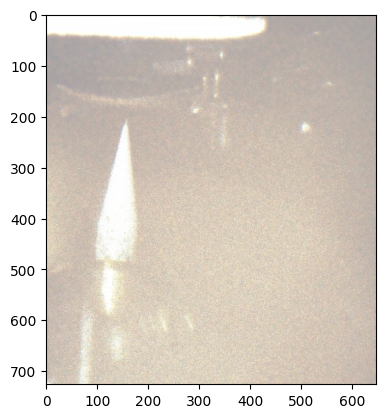

In [19]:
hyNet = hyde.FORPDN_SURE()
show_tensor_output_as_plt(hyNet(input_tens))

So it turns out that I'm running into issues while attempting to run code primarily because it seems that oftnetimes you cannot use the hyde library if you don't have a GPU. More importantly, I don't have an Nvidia GPU(or any GPU for that fact) so I really do need to use a different method of accesing these models. Hence I created a method below to get test models from a folder and test the ability of the models.


In [38]:
#is passed a .pth file's directory which is then loaded to a model and turned to eval mode
def pth_to_tensor(pth_dir):
    loaded_state_dict = torch.load(pth_dir,map_location='cpu')
    print(loaded_state_dict.keys())
    loaded_tensor: torch.model = None
    loaded_tensor = loaded_tensor.load_state_dict(loaded_state_dict)
    loaded_tensor.eval()
    return loaded_tensor

In [39]:

# Run NNInference on CPU (no GPU)
nn_method_cpu = pth_to_tensor('hyde-bs16-blindSNR-gaussian-memnet-l2.pth')

apply_tensor(PIL_im,nn_method_cpu)

dict_keys(['net', 'optimizer', 'epoch'])


AttributeError: 'NoneType' object has no attribute 'load_state_dict'

In [ ]:
# Since there is no GPU, ensure all torch operations use CPU
input_tens_cpu = torch.tensor(np.array(PIL_im), dtype=torch.float32, device="cpu")
hyres_cpu = hyde.HyRes()
output_cpu = hyres_cpu(input_tens_cpu)

output_np_cpu = output_cpu.detach().cpu().numpy()
output_np_cpu = np.clip(output_np_cpu, 0, 255).astype(np.uint8)
plt.imshow(output_np_cpu)
plt.show()